In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd

Loading dataset

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.count()

,0
age,442
sex,442
bmi,442
bp,442
s1,442
s2,442
s3,442
s4,442
s5,442
s6,442


In [ ]:
print("Missing values:\n", df.isnull().sum().sum())

Missing values:
 0


In [ ]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


No missing values found

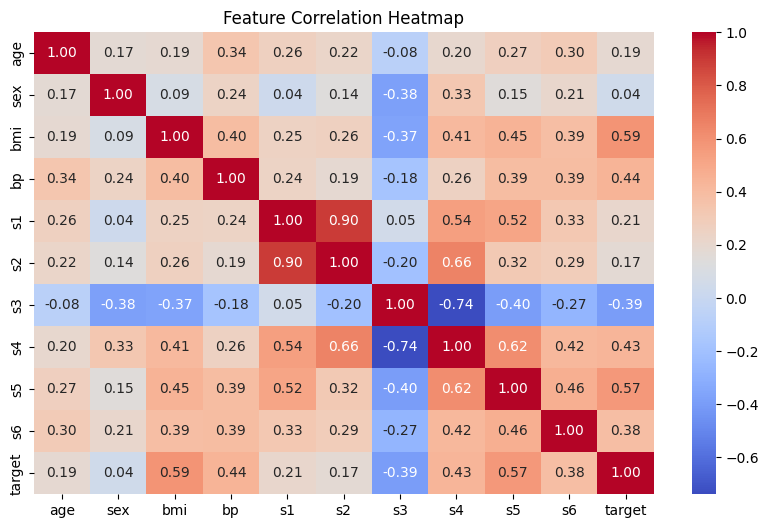

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

bni and s5 are heabily depends to the diabetic high value .s3 depends on negatibe or low value of diabetic

In [ ]:
# Normalize features
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 29557.4453 - mae: 154.0312 - val_loss: 22170.5508 - val_mae: 132.9326
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31071.6172 - mae: 158.1578 - val_loss: 21772.7715 - val_mae: 131.5150
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30105.7168 - mae: 154.4318 - val_loss: 21189.7012 - val_mae: 129.4552
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30967.6777 - mae: 156.3340 - val_loss: 20302.5449 - val_mae: 126.3420
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27743.9395 - mae: 147.4481 - val_loss: 19011.6426 - val_mae: 121.7680
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25809.3184 - mae: 141.6447 - val_loss: 17262.3555 - val_mae: 115.3226
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23828.3809 - mae: 134.8545 - val_loss: 15002.6299 - val_mae: 106.4658
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20323.2070 - mae: 125.1038 - val_loss: 12418.1797 - val_

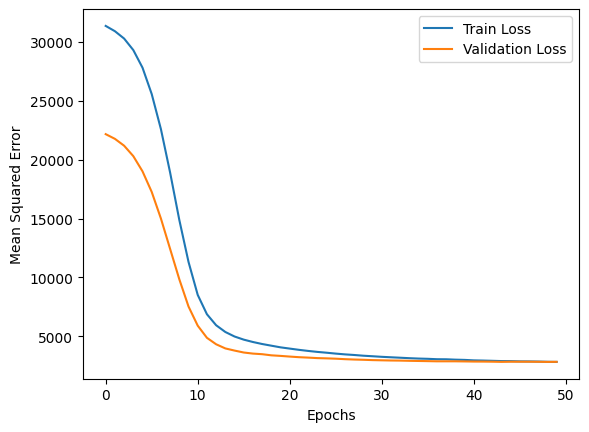

In [ ]:
# Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
#Model complie
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)
#Model train
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

#Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [ ]:
# 5. Evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Base Model - MSE: {mse:.2f}")
print(f"Base Model - R2 Score: {r2:.4f}")
print("Base Model - MAE:", mean_absolute_error(y_test, y_pred_imp))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Base Model - MSE: 2947.20
Base Model - R2 Score: 0.4437
Base Model - MAE: 42.19361581695214


Basically .40 in R2 is not that much good one.Only 2 dense laters were introducted and no dropout to avoid overfitting.


##Improvinng the model section

Epoch 1/300


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 30810.0938 - val_loss: 20739.5527
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27191.5234 - val_loss: 10533.5713
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11233.8818 - val_loss: 3545.1404
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5625.5981 - val_loss: 3236.0886
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3894.9229 - val_loss: 2885.8716
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3944.1719 - val_loss: 2855.8330
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3216.1406 - val_loss: 2859.3223
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3104.4121 - val_loss: 2861.3787
Epoch 9/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3142.2883 - val_loss: 2882.3042
Epoch 10/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3452.5867 - val_loss: 2792.0769
Epoch 11/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3285.2874 - val_loss: 2808.9856
Epo

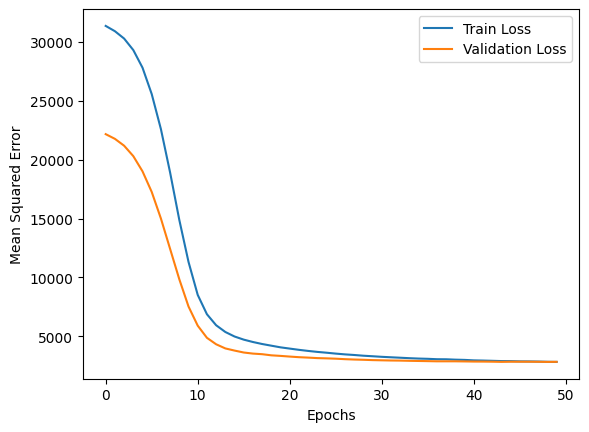

In [ ]:
improved_model = Sequential()
improved_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
improved_model.add(Dropout(0.2))
improved_model.add(Dense(128, activation='relu'))
improved_model.add(Dropout(0.2))
improved_model.add(Dense(64, activation='relu'))
improved_model.add(Dense(32, activation='relu'))
improved_model.add(Dense(1))
#Complie
improved_model.compile(optimizer='adam', loss='mse')

# Early stopping method
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# model tarining
improved_model.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)
#Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()



In [ ]:
#Evauate
y_pred_imp = improved_model.predict(X_test)

print("Improved Model - MSE:", mean_squared_error(y_test, y_pred_imp))
print("Improved Model - R2 Score:", r2_score(y_test, y_pred_imp))
print("Improved Model - MAE:", mean_absolute_error(y_test, y_pred_imp))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Improved Model - MSE: 2871.9092570100415
Improved Model - R2 Score: 0.4579412985265795
Improved Model - MAE: 42.29594674271144


Comparing the basemodel and the improved mode r2 scire is increased 5% only.Also error in the model is rediced from around 3000 to 2000 ie its mean squared error so it will basically from  42.19 to 42.2
9



